# 03 - Interactive Viz

## Deadline

Wednesday November 8th, 2017 at 11:59PM

## Important Notes

- Make sure you push on GitHub your Notebook with all the cells already evaluated
- Note that maps do not render in a standard Github environment : you should export them to HTML and link them in your notebook.
- Remember that `.csv` is not the only data format. Though they might require additional processing, some formats provide better encoding support.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you plan to implement!
- Please write all your comments in English, and use meaningful variable names in your code

## Background

In this homework we will be exploring interactive visualization, which is a key ingredient of many successful data visualizations (especially when it comes to infographics).

Unemployment rates are major economic metrics and a matter of concern for governments around the world. Though its definition may seem straightforward at first glance (usually defined as the number of unemployed people divided by the active population), it can be tricky to define consistently. For example, one must define what exactly unemployed means : looking for a job ? Having declared their unemployment ? Currently without a job ? Should students or recent graduates be included ? We could also wonder what the active population is : everyone in an age category (e.g. `16-64`) ? Anyone interested by finding a job ? Though these questions may seem subtle, they can have a large impact on the interpretation of the results : `3%` unemployment doesn't mean much if we don't know who is included in this percentage. 

In this homework you will be dealing with two different datasets from the statistics offices of the European commission ([eurostat](http://ec.europa.eu/eurostat/data/database)) and the Swiss Confederation ([amstat](https://www.amstat.ch)). They provide a variety of datasets with plenty of information on many different statistics and demographics at their respective scales. Unfortunately, as is often the case is data analysis, these websites are not always straightforward to navigate. They may include a lot of obscure categories, not always be translated into your native language, have strange link structures, … Navigating this complexity is part of a data scientists' job : you will have to use a few tricks to get the right data for this homework.

For the visualization part, install [Folium](https://github.com/python-visualization/folium) (*HINT*: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!). Folium's `README` comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find two `.topojson` files, containing the geo-coordinates of 

- European countries (*liberal definition of EU*) (`topojson/europe.topojson.json`, [source](https://github.com/leakyMirror/map-of-europe))
- Swiss cantons (`topojson/ch-cantons.topojson.json`) 

These will be used as an overlay on the Folium maps.

## Assignment

1. Go to the [eurostat](http://ec.europa.eu/eurostat/data/database) website and try to find a dataset that includes the european unemployment rates at a recent date.

   Use this data to build a [Choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) which shows the unemployment rate in Europe at a country level. Think about [the colors you use](https://carto.com/academy/courses/intermediate-design/choose-colors-1/), how you decided to [split the intervals into data classes](http://gisgeography.com/choropleth-maps-data-classification/) or which interactions you could add in order to make the visualization intuitive and expressive. Compare Switzerland's unemployment rate to that of the rest of Europe.

2. Go to the [amstat](https://www.amstat.ch) website to find a dataset that includes the unemployment rates in Switzerland at a recent date.

   > *HINT* Go to the `details` tab to find the raw data you need. If you do not speak French, German or Italian, think of using free translation services to navigate your way through. 

   Use this data to build another Choropleth map, this time showing the unemployment rate at the level of swiss cantons. Again, try to make the map as expressive as possible, and comment on the trends you observe.

   The Swiss Confederation defines the rates you have just plotted as the number of people looking for a job divided by the size of the active population (scaled by 100). This is surely a valid choice, but as we discussed one could argue for a different categorization.

   Copy the map you have just created, but this time don't count in your statistics people who already have a job and are looking for a new one. How do your observations change ? You can repeat this with different choices of categories to see how selecting different metrics can lead to different interpretations of the same data.

3. Use the [amstat](https://www.amstat.ch) website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between *Swiss* and *foreign* workers.

   The Economic Secretary (SECO) releases [a monthly report](https://www.seco.admin.ch/seco/fr/home/Arbeit/Arbeitslosenversicherung/arbeitslosenzahlen.html) on the state of the employment market. In the latest report (September 2017), it is noted that there is a discrepancy between the unemployment rates for *foreign* (`5.1%`) and *Swiss* (`2.2%`) workers. 

   Show the difference in unemployment rates between the two categories in each canton on a Choropleth map (*hint* The easy way is to show two separate maps, but can you think of something better ?). Where are the differences most visible ? Why do you think that is ?

   Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map. Make a bar plot, which is a better suited visualization tool for this type of multivariate data.

4. *BONUS*: using the map you have just built, and the geographical information contained in it, could you give a *rough estimate* of the difference in unemployment rates between the areas divided by the [Röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben)?

## Imports

In [1]:
import os 
import pandas as pd 
import json 

import folium

import re
import csv

import seaborn as sns 
import matplotlib.pyplot as plt 

import numpy as np
from branca.colormap import linear

%matplotlib inline

from IPython.display import display
# Allow to display html 
from IPython.core.display import display, HTML



In [2]:
# Allows to display full dataframe
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

In [3]:
# Function to print a list with one element per line 
def printList(liste):
    for x in liste:
        print(x)
        
#function to load and display saved maps 
def displaymap(url):
    iframe='<iframe src=' + url+ ' width=900 height=700></iframe>'
    display(HTML(iframe))

In [4]:
assert(folium.__version__ =='0.5.0')

## 1. European unemployement rate

In [5]:
Lausanne = [46.519962, 6.633597]

### Loading the topojson file
First we load the topojson file to visualize on map as follow : 
* Create a europe-map
* Load europe topojson with TopoJson (objects is defined inside the topojson file)
* Add the layer to the map and plot it (we can deselect it by clicking on the layer icon)

In [6]:
europe = './topojson/europe.topojson.json'

europe_map = folium.Map(location = Lausanne, tiles='cartodbpositron',zoom_start=3)
folium.TopoJson(open(europe),
                'objects.europe',
                name='topoJson layer'
                
               ).add_to(europe_map)
folium.LayerControl().add_to(europe_map)

url_save = "./html/europe_map.html"
europe_map.save(url_save)
# europe_map
displaymap(url_save)

In [7]:
# Remove space at the end of column names 
def remove_last_space(string):
    result = re.sub('\s*$', '', string)
    return result


### Loading the data 

We will use the data from the eurostat website. 

* Load data from tsv file 
* extract only one subsample of data 
* Plot the data in histogram to find categories of countries
* extract the country id to match it with our topojson data and find the missing countries to plot with another color
* plot a chloropleth map

Unemployment by sex and age - annual average

We will display the countries for which we don't have the unemployment rate with a dark color on an independent layer that the user can remove or add. 

Loading of dataset :   
The dataset is a tsv file where the data is separated by a tab. The index is separated by commas. That is why we separate based on tab and comma and then create a multi-index that will be meaningful.


In [8]:
europe_data = pd.DataFrame.from_csv('./dataset/une_rt_a.tsv', sep='\t|,', header=0)

# europe_data.index = ['unit', 'sex', 'geo\time']
# list(europe_data.index)

# Create multi-index on type, age, sex, and geo (country id)
index_names_dict_list = [{'index_data':list(europe_data.unit), #type 
                         'name':'type'},
                         {'index_data':europe_data.index,  # age
                         'name':'age'},
                         {'index_data':list(europe_data.sex), # sex
                         'name': 'sex'},
                         {'index_data':list(europe_data[europe_data.columns[2]]), # geo
                         'name':'geo'},]


# levels_order = [3, 0, 1, l2]
# index_names_dict_list = [index_names_dict_list[i] for i in levels_order]


# Apply multi-index on data 
europe_data.index = [x['index_data'] for x in index_names_dict_list]
# Add names to the index columns 
europe_data.index.names = [x['name'] for x in index_names_dict_list]
# Remove last spaces in column names
europe_data.columns = [remove_last_space(x) for x in list(europe_data.columns)]
#Remove the columns that have been added to the index
europe_data_reduced = europe_data.drop(europe_data.columns[:3],axis=1)

# Select data for all sex, age and based on active population that will be sorted
data_to_plot = europe_data_reduced['2016'].loc['PC_ACT', 'TOTAL','T'].sort_values()

#Remove aggregated values from the data (for the histogram) (EU,EA)
data_to_plot = data_to_plot[[re.search('EA|EU',x)  is None for x in list(data_to_plot.index)]]

# print(data_to_plot[[re.search('EA|EU',x)  is None for x in list(data_to_plot.index)]])
# print(data_to_plot.index)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:1231: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  infer_datetime_format=infer_datetime_format)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: PerformanceWarning: indexing past lexsort depth may impact performance.


In [9]:
data_to_plot[[re.search('EA',x)  is not None for x in list(data_to_plot.index)]]

Series([], Name: 2016, dtype: float64)

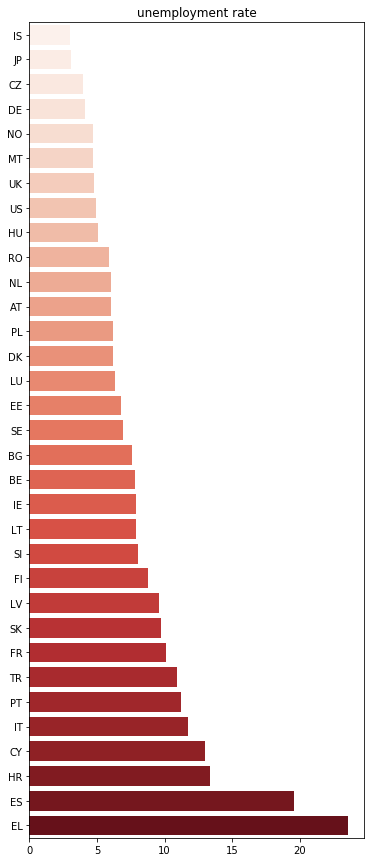

In [10]:
# data_to_plot
fig,ax = plt.subplots(figsize=(6,15))
y = list(data_to_plot.index)
x = list(data_to_plot)
sns.barplot(x,y,ax=ax, palette='Reds')
plt.title('unemployment rate')
plt.show()



### Missing countries in the dataset

Now we print the countries that are on the topojson but for which we don't have value.    
We want to put an extra layer to put their color to dark gray. 


In [11]:
geo_data = open(europe)

geo_data_json = json.load(geo_data)
countries = geo_data_json['objects']['europe']['geometries']
# print(geo_data_json['objects']['europe'])
id_topo = [x['id'] for x in countries]
name_topo = [x['properties']['NAME'] for x in countries]
dict_topo = {'id_2':id_topo, 'name_2':name_topo}


# Create DataFrame to merge both 
df1 = pd.DataFrame(list(data_to_plot.index),columns=['id_1'])
df2 = pd.DataFrame(dict_topo)
df_tot = pd.merge(df1, df2,left_on='id_1', right_on='id_2', how='outer')
# df_missing = df_tot[df_tot['id_1'].isnull()]
df_nan = df_tot[df_tot['id_1'].isnull()][['id_2','name_2']]
display(df_nan)
list_nan = list(df_nan['id_2'])
# sorted(list_nan)



,id_2,name_2
33,AZ,Azerbaijan
34,AL,Albania
35,AM,Armenia
36,BA,Bosnia and Herzegovina
37,GE,Georgia
38,GR,Greece
39,IL,Israel
40,BY,Belarus
41,LI,Liechtenstein
42,MK,The former Yugoslav Republic of Macedonia


### Plotting the data 

We can select to display the 'nan' countries with the layers of the map.   
We will separate the last two countries from the rest as their values are really different, and then create a linear scale. 

In [12]:
highlight_function = lambda x:{'opacity':1}

# Function to check if an element is in a string list 
def checkStringList(stringList, string):
    return [x for x in stringList if string in x] != []

name_data = '2016, total population'
    
#     Plot a choropleth map with the values found in the data 
europe_map = folium.Map(location = Lausanne, tiles='cartodbpositron',zoom_start=3)

style_function_nan = lambda x:{'fillColor':'#000000' if checkStringList(list_nan,x['id']) else '#ffffff',
                               'opacity':'1' if checkStringList(list_nan,x['id']) else '0',
                              'color':0,}

# Create scale 
threshold_scale = np.linspace(data_to_plot[0],
                              data_to_plot[-4],
                             num = 5).tolist()
threshold_scale.append(data_to_plot[-3])

europe_map.choropleth(geo_data=open(europe),
                  topojson='objects.europe',
                  data = data_to_plot,
                  columns=['geo','2016'],
                  key_on='id',
                  fill_color='YlOrRd',
                  fill_opacity = 0.7,
                  highlight = highlight_function,
                  threshold_scale = threshold_scale,
                  name=name_data)



folium.TopoJson(open(europe),
                'objects.europe',
                style_function=style_function_nan,
                name='countries with no values',
               ).add_to(europe_map)

folium.LayerControl().add_to(europe_map)
# Add an extra layer for the countries we don't want to check 


#     europe_map.save(selected_index + '.html')
url_save = "./html/europe_unemployment.html"
europe_map.save(url_save)
# display(europe_map)
displaymap(url_save)

## 2. Swiss Unemployement

Let us first import the data. We will translate the features so that an non french speaker can understand them. Also we remove the special character in the data so that we can cast them to int or float. We also calculate the Active Population per Canton by dividing the number of jobseekers by the unemployement rate. It is interesting to note that here the unemployement rate is defined as the total number of people looking for a job (whether they have one or not) divided by the active population. By having the active population, we will later be able to find the unregistered jobseekers rate and the registered jobseekers rate. 
We also give an ID to each canton (the same as in the json file) to match them with the topology provided for us.

In [13]:
df=pd.read_csv("./dataset/2_1 Taux de chomage.csv",encoding='utf-8-sig')

# Dictionary to translate the canton to an id 
find_id={"Zurich":'ZH',
         "Berne": 'BE',
         'Lucerne':'LU',
         'Uri':'UR',
         'Schwyz':'SZ',
         "Obwald":"OW",
         "Nidwald":"NW",
         "Glaris":"GL",
         'Zoug':'ZG',
         'Fribourg':'FR',
         "Soleure":"SO",
         'Bâle-Ville':"BS",
         'Bâle-Campagne':'BL',
        "Schaffhouse":'SH',
         "Appenzell Rhodes-Extérieures":"AR",
         "Appenzell Rhodes-Intérieures":"AI",
         "St-Gall":"SG",
         "Grisons":"GR",
         "Argovie":"AG",
         "Thurgovie":"TG",
         "Tessin":"TI",
         "Vaud":"VD",
         "Valais":"VS",
         "Neuchâtel":"NE",
         "Genève":"GE",
         "Jura":"JU",
         "Total":"TOTAL"
        }
    
# Translating, and casting to types
df["Jobseeking rate"]=df["Taux de chomage"]
df["Registered jobseekers"]=df["Chomeurs inscrits"].apply(func=lambda x: x.replace("'",""))
df["Registered jobseekers"]=df["Registered jobseekers"].astype(np.int64)
df["Jobseekers"]=df["Demandeurs d\'emploi"].apply(func=lambda x: x.replace("'",""))
df["Jobseekers"]=df["Jobseekers"].astype(np.int64)
df["Unregistered jobseekers"]=df["Demandeurs d\'emploi non chomeurs"].apply(func=lambda x: x.replace("'",""))
df["Unregistered jobseekers"]=df["Unregistered jobseekers"].astype(np.int64)
df['Active population']=df["Jobseekers"]/df["Jobseeking rate"]*100
df['ID']=df['Canton'].apply(lambda canton:find_id[canton])
df=df.drop(['Taux de chomage','Chomeurs inscrits',"Demandeurs d'emploi","Demandeurs d'emploi non chomeurs"],axis=1)
df

,Canton,Jobseeking rate,Registered jobseekers,Jobseekers,Unregistered jobseekers,Active population,ID
0,Zurich,3.3,27225,34156,6931,1.035030e+06,ZH
1,Berne,2.4,13658,18385,4727,7.660417e+05,BE
2,Lucerne,1.7,3885,6756,2871,3.974118e+05,LU
3,Uri,0.6,112,257,145,4.283333e+04,UR
4,Schwyz,1.7,1455,2229,774,1.311176e+05,SZ
5,Obwald,0.7,153,319,166,4.557143e+04,OW
6,Nidwald,1.0,248,436,188,4.360000e+04,NW
7,Glaris,1.8,416,713,297,3.961111e+04,GL
8,Zoug,2.3,1543,2615,1072,1.136957e+05,ZG
9,Fribourg,2.7,4466,7837,3371,2.902593e+05,FR


In the Europpean dataset, we don't have any unemployement rate for Switzerland. Hence, the following line is a weighted average of the Cantons and is used to complete the dataset in part 1. 

In [14]:
(df['Jobseeking rate']*df['Active population']).sum()/df['Active population'].sum()

2.9273205131875737

We will use a color map so that when we plot different rates, a particular value will always have the same color. It will allow us to observe with consistency the results

In [15]:
canton_topo_path = 'topojson/ch-cantons.topojson.json'
topo_json_data = json.load(open(canton_topo_path))

colormap = linear.OrRd.scale(0,df['Jobseeking rate'].max())
colormap

### Job seeking rate in Switzerland per canton

In [16]:
m=folium.Map((46.685617, 8.2),zoom_start=8,tiles="cartodbpositron")

jobseeking_rate_layer=folium.TopoJson(
    topo_json_data,
    object_path='objects.cantons',
    name='Jobseeking rate (%)',
    style_function=lambda feature: {
        'fillColor': colormap(df.loc[df['ID'] == feature['id'],'Jobseeking rate'].values[0]),
        'color': 'grey',
        'weight': 1,
        #'dashArray': '5, 5',
        'fillOpacity': 0.7,
    }
)

colormap.caption = 'Jobseeking rate (%) (unemployed and employed) in Switzerland per canton'

jobseeking_rate_layer.add_to(m)
colormap.add_to(m)

url_save = './html/Jobseeking_rate.html'
m.save(url_save)
displaymap(url_save)

# m

This is the map representing the proportion of people who are looking for a job, whether they have one or not. We can clearly see that there is a higher jobseeking rate in the west of switzerland than in the east. Hence, even though there is a 3% jobseeking rate throughout Switzerland, it is higher in canton like Geneva, where it reaches 5%

In [17]:
m=folium.Map((46.685617, 8.2),zoom_start=8,tiles="cartodbpositron")
df['Jobseeking rate (unregistered)']=df['Unregistered jobseekers']/df['Active population']*100

jobseeking_rate_layer=folium.TopoJson(
    topo_json_data,
    object_path='objects.cantons',
    name='Jobseeking rate (%)',
    style_function=lambda feature: {
        'fillColor': colormap(df.loc[df['ID'] == feature['id'],'Jobseeking rate (unregistered)'].values[0]),
        'color': 'grey',
        'weight': 1,
        #'dashArray': '5, 5',
        'fillOpacity': 0.7,
    }
)

colormap.caption = 'Jobseeking rate (%) (unregistered) in Switzerland per canton'

jobseeking_rate_layer.add_to(m)
colormap.add_to(m)

url_save = './html/Jobseeking_rate_unregistered.html'
m.save(url_save)

# m
displaymap(url_save)

We could ask ourselves, in the people that are currently looking for a job, how many of them actually have a job ? This maps shows how many of the jobseekers are not registered. This is usually the case when the jobseekers already has a job. As we can see, there is not a lot of people looking for a job while they have one. Also, even though the west has still a bit more unregistered jobseekers, the difference is less shocking than before.

In [18]:
m=folium.Map((46.685617, 8.2),zoom_start=8,tiles="cartodbpositron")
df['Jobseeking rate (registered)']=df['Registered jobseekers']/df['Active population']*100

jobseeking_rate_layer=folium.TopoJson(
    topo_json_data,
    object_path='objects.cantons',
    name='Jobseeking rate (%)',
    style_function=lambda feature: {
        'fillColor': colormap(df.loc[df['ID'] == feature['id'],'Jobseeking rate (registered)'].values[0]),
        'color': 'grey',
        'weight': 1,
        #'dashArray': '5, 5',
        'fillOpacity': 0.7,
    }
)
colormap.caption = 'Jobseeking rate (%) (registered) in Switzerland per canton'

jobseeking_rate_layer.add_to(m)
colormap.add_to(m)

url_save = './html/Jobseeking_rate_registered.html'
m.save(url_save)

# m
displaymap(url_save)

This time we plot the registered jobseekers. This usally mean the people looking for a job without having one. As we can see, this  represent higher percentages than the unregistered ones. We see also clearly that the difference west/east comes from the registered jobseekers and not the unregistered jobseekers.

In [19]:
df['Jobseeking rate (registered)']=df['Registered jobseekers']/df['Jobseekers']*100

m=folium.Map((46.685617, 8.2),zoom_start=8,tiles="cartodbpositron")
m.choropleth(geo_data=topo_json_data,
                            topojson='objects.cantons',
                            data=df,
                            columns=['ID', 'Jobseeking rate (registered)'],
                            key_on='feature.id',
                            fill_color='BuPu',
                            fill_opacity=0.7,
                            line_opacity=0.4,
                            legend_name='Percentage of registered individuals among jobseekers in Switzerland per canton',
                            highlight=True)

url_save = './html/registered_vs_total.html'
m.save(url_save)

# m
displaymap(url_save)

To illustrate even more the proportion of registered jobseekers among the jobseekers, we have displayed it on the map. The darker a canton, the more registered jobseekers there are compared to unregistered ones. We can see for example that most of the jobseekers in Geneva are in unemployed.

### 3. Swiss/Foreign unemployement

Use the amstat website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between Swiss and foreign workers.
The Economic Secretary (SECO) releases a monthly report on the state of the employment market. In the latest report (September 2017), it is noted that there is a discrepancy between the unemployment rates for foreign (5.1%) and Swiss (2.2%) workers.
Show the difference in unemployment rates between the two categories in each canton on a Choropleth map (hint The easy way is to show two separate maps, but can you think of something better ?). Where are the differences most visible ? Why do you think that is ?
Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map. Make a bar plot, which is a better suited visualization tool for this type of multivariate data.

In order to find the data, we have to go to 'Chômeurs' under the Analyse tab. We then go into 'Détails' and we export as csv the dataset 2.1. Taux de chômage. We need to make sure that we take the nationalities as a parameter. The unemployement rate of september 2017 lies into the data which is the most recent one.  
  
We will now clean and arrange the csv file in order to open it. To do so, we do the following steps:
- We first get rid of the two first rows because it is just the title of the data
- We then delete the column 'Mois' as it is empty
- We delete all the columns sept-17 because it is the same as Total
- We delete the first row and rewrite Canton and Nationilité for the first two columns

> Note: We assume the unemployement rate to be the 'registered unemployed' people divided by the 'activate population' (as found in the data) for each cantons.  

This results in the following dataframe.

In [20]:
df_ch_nations_origin = pd.DataFrame.from_csv('./dataset/modif_ch_unemployement_nationalities.csv', sep=';', encoding='ISO-8859-1', index_col=['Canton'])
df_ch_nations = df_ch_nations_origin.drop('Demandeurs d\'emploi', 1)
df_ch_nations['Unemployed registered'] = df_ch_nations['Unemployed registered'].apply(lambda x : x.replace("'","")).astype(np.int64)
df_ch_nations.head()

,Nationality,Unemployement rate,Unemployed registered
Canton,,,
Zurich,Etrangers,5.3,12111
Zurich,Suisses,2.5,15114
Berne,Etrangers,5.5,4900
Berne,Suisses,1.8,8758
Lucerne,Etrangers,3.9,1593


We now create one dataframe for swiss and foreigners

In [21]:
df_ch_nations_swiss = df_ch_nations[df_ch_nations['Nationality']=='Suisses']
df_ch_nations_foreign = df_ch_nations[df_ch_nations['Nationality']=='Etrangers']

We now want to plot the two resulting unemployement rates for each cantons. To do so, we first need to find the matching name with the json format of the topo.

In [22]:
# Fetch the topojson file
ch_canton = './topojson/ch-cantons.topojson.json'
geo_json_data = json.load(open(ch_canton))
# Find the names of every geometry figures
canton_names = list(map(lambda x: x['properties']['name'], geo_json_data['objects']['cantons']['geometries']))
# Add names in the dataframes
df_ch_nations_foreign['topo names'] = canton_names
df_ch_nations_swiss['topo names'] = canton_names

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We choose to plot the rate with a purle/red because we want to highlight the highest unemployement rate with a dark red and still not see the cantons with low unemployement (light blue) as a good thing as there is still improvement to be done. In order to see the difference between Swiss and foreigners, we use the same threshold scale for both maps.


In [23]:
# Initialize the middle of switzerland and the map
ch_coord = [46.905379, 8.333550]
m = folium.Map(location=ch_coord, tiles='cartoDB positron', zoom_start=8)

jobseeking_rate_layer=folium.TopoJson(
    open(ch_canton),
    object_path='objects.cantons',
    name='swiss unemployement',
    style_function=lambda feature: {
        'fillColor': colormap(df_ch_nations_swiss.loc[df_ch_nations_swiss['topo names'] == feature['properties']['name'],'Unemployement rate'].values[0]),
        'color': 'grey',
        'weight': 1,
        'fillOpacity': 0.7,
    }
)
colormap.caption = 'Swiss unemployement rate per canton (in %)'

jobseeking_rate_layer.add_to(m)
colormap.add_to(m)

#Save and print results
url_save = "./html/swiss_unemployement.html"
m.save(url_save)

# m
displaymap(url_save)

In [24]:
# We do the same for foreigners
ch_coord = [46.905379, 8.333550]
m = folium.Map(location=ch_coord, tiles='cartoDB positron', zoom_start=8)

jobseeking_rate_layer=folium.TopoJson(
    open(ch_canton),
    object_path='objects.cantons',
    name='foreigners unemployement',
    style_function=lambda feature: {
        'fillColor': colormap(df_ch_nations_foreign.loc[df_ch_nations_foreign['topo names'] == feature['properties']['name'],'Unemployement rate'].values[0]),
        'color': 'grey',
        'weight': 1,
        'fillOpacity': 0.7,
    }
)
colormap.caption = 'Foreigners unemployement rate per canton (in %)'

jobseeking_rate_layer.add_to(m)
colormap.add_to(m)

#Save and print results*
url_save = "./html/foreigner_unemployement.html"
m.save(url_save)
# m
displaymap(url_save)

We can clearly see that (as expected) the unemployement rate is higher for foreigners. It is also interesting to note that the West side of the country (Romandy) is the most sensible regarding the difference Swiss/Foreigners rate- especially Basel.  
One explication could be that employers prefer to hire swiss people.

In [25]:
print('Average swiss unemployement rate in September 2017: %.2f %%' % df_ch_nations_swiss['Unemployement rate'].mean())
print('Average foreigners unemployement rate in September 2017: %.2f %%' % df_ch_nations_foreign['Unemployement rate'].mean())

Average swiss unemployement rate in September 2017: 1.96 %
Average foreigners unemployement rate in September 2017: 4.47 %


In order to better visualize the proportion of foreigners in unemployed individuals per canton, we have decided to plot it :

In [26]:
m = folium.Map(location=ch_coord, tiles='cartoDB positron', zoom_start=8)

proportion_foreigners=df_ch_nations_foreign.set_index('topo names')['Unemployed registered']/(df_ch_nations_swiss.set_index('topo names')['Unemployed registered']+df_ch_nations_foreign.set_index('topo names')['Unemployed registered'])
m.choropleth(open(ch_canton), data=proportion_foreigners, columns=['topo names', 'Unemployed registered'], 
             topojson='objects.cantons', name='Proportion of foreigners in unemployed individuals',
                  key_on="feature.properties.name", fill_color='BuPu', legend_name='Foreigner proportion in unemployemed individuals')


url_save = "./html/proportion_foreigners.html"
m.save(url_save)
# m
displaymap(url_save)

As we can see usually the proportion of foreigners among swiss people is usually the same every where except at a few cantons. Also they are usually less than the swiss unemployed individuals. This is because there are less foreigners than Swiss. So even though there is less unemployement people among swiss than among foreigners, there are overall more swiss unemployed than foreigners

As stated SECO and obeserved, there is a discrepancy between foreign and swiss workers.  
 
### Adding age groups
We will now add difference between age groups. In order to do this, we will use a different dataset. We select 1.1 Chomeurs et demandeurs d'emplois selon divers critères, with the following parameters:
- Month september 2017
- Only take Chômeurs inscrits
- Nationalité and Classe d'age
- No "secteur" as we only need the total number
- Make sure to export the dataset without the header  
  
Then again, we translate the column names and delete the 'Mois' column.  
This results in the following dataframe.

In [27]:
# Fetch the dataset
df_ch_age_nat = pd.DataFrame.from_csv('./dataset/ch_unemp_nationalities_age.csv', encoding='ISO-8859-1', sep=';')

def translate_age(x):
    if x == '15-24 ans':
        return '15-25'
    elif x=='25-49 ans':
        return '25-49'
    else:
        return '50+'
# Translate the age category
df_ch_age_nat['Age group name'] = df_ch_age_nat['Age group name'].apply(lambda x: translate_age(x))
df_ch_age_nat.head()

,Nationality,Age group,Age group name,Unemployed registered
Canton,,,,
Zurich,Etrangers,1,15-25,1'015
Zurich,Etrangers,2,25-49,8'846
Zurich,Etrangers,3,50+,2'250
Zurich,Etrangers,Total,50+,12'111
Zurich,Suisses,1,15-25,2'405


In [28]:
# Get rid of lines with total numbers
df_ch_age_nat_no_total = df_ch_age_nat[df_ch_age_nat['Age group']!='Total']
df_ch_age_nat_no_total = df_ch_age_nat_no_total[df_ch_age_nat_no_total['Nationality']!='Total']

# Transform numbers to nuerical values
df_ch_age_nat_no_total['Unemployed registered'] = pd.to_numeric(df_ch_age_nat_no_total['Unemployed registered'].str.replace('\'', ''))

# Only take the relevant columns
df_foreign = df_ch_age_nat_no_total[df_ch_age_nat_no_total['Nationality']=='Etrangers'].drop(labels=['Nationality', 'Age group'], axis=1)
df_swiss = df_ch_age_nat_no_total[df_ch_age_nat_no_total['Nationality']=='Suisses'].drop(labels=['Nationality', 'Age group'], axis=1)
df_foreign.head()

,Age group name,Unemployed registered
Canton,,
Zurich,15-25,1015
Zurich,25-49,8846
Zurich,50+,2250
Berne,15-25,597
Berne,25-49,3316


In [29]:
# Rearrange the dataframes to be able to plot it in bars
df_age_foreign = pd.pivot_table(df_foreign.reset_index(), values='Unemployed registered', index='Canton', columns='Age group name')
df_age_swiss = pd.pivot_table(df_swiss.reset_index(), values='Unemployed registered', index='Canton', columns='Age group name')

# Fetch the active population and add it to the dataframes
act_pop_list = list(df.sort(columns='Canton')['Active population'][df['Canton']!='Total'])
df_age_swiss['Active population'] = act_pop_list
df_age_foreign['Active population'] = act_pop_list

df_age_foreign['15-25 rate']=df_age_foreign['15-25']/df_age_foreign['Active population']*100
df_age_foreign['25-49 rate']=df_age_foreign['25-49']/df_age_foreign['Active population']*100
df_age_foreign['50+ rate']=df_age_foreign['50+']/df_age_foreign['Active population']*100
df_age_swiss['15-25 rate']=df_age_swiss['15-25']/df_age_swiss['Active population']*100
df_age_swiss['25-49 rate']=df_age_swiss['25-49']/df_age_swiss['Active population']*100
df_age_swiss['50+ rate']=df_age_swiss['50+']/df_age_swiss['Active population']*100
df_age_foreign.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Age group name,15-25,25-49,50+,Active population,15-25 rate,25-49 rate,50+ rate
Canton,,,,,,,
Appenzell Rhodes-Extrieures,21,108,50,50941.176471,0.041224,0.212009,0.098152
Appenzell Rhodes-Intrieures,6,10,7,14571.428571,0.041176,0.068627,0.048039
Argovie,597,3270,1105,522241.379310,0.114315,0.626147,0.211588
Berne,597,3316,987,766041.666667,0.077933,0.432875,0.128844
Ble-Campagne,165,1089,342,197857.142857,0.083394,0.550397,0.172852


> Note: Again, we assume here that the unemployement rate is the ratio of registered unemployed people over the active population found in the data for each canton.

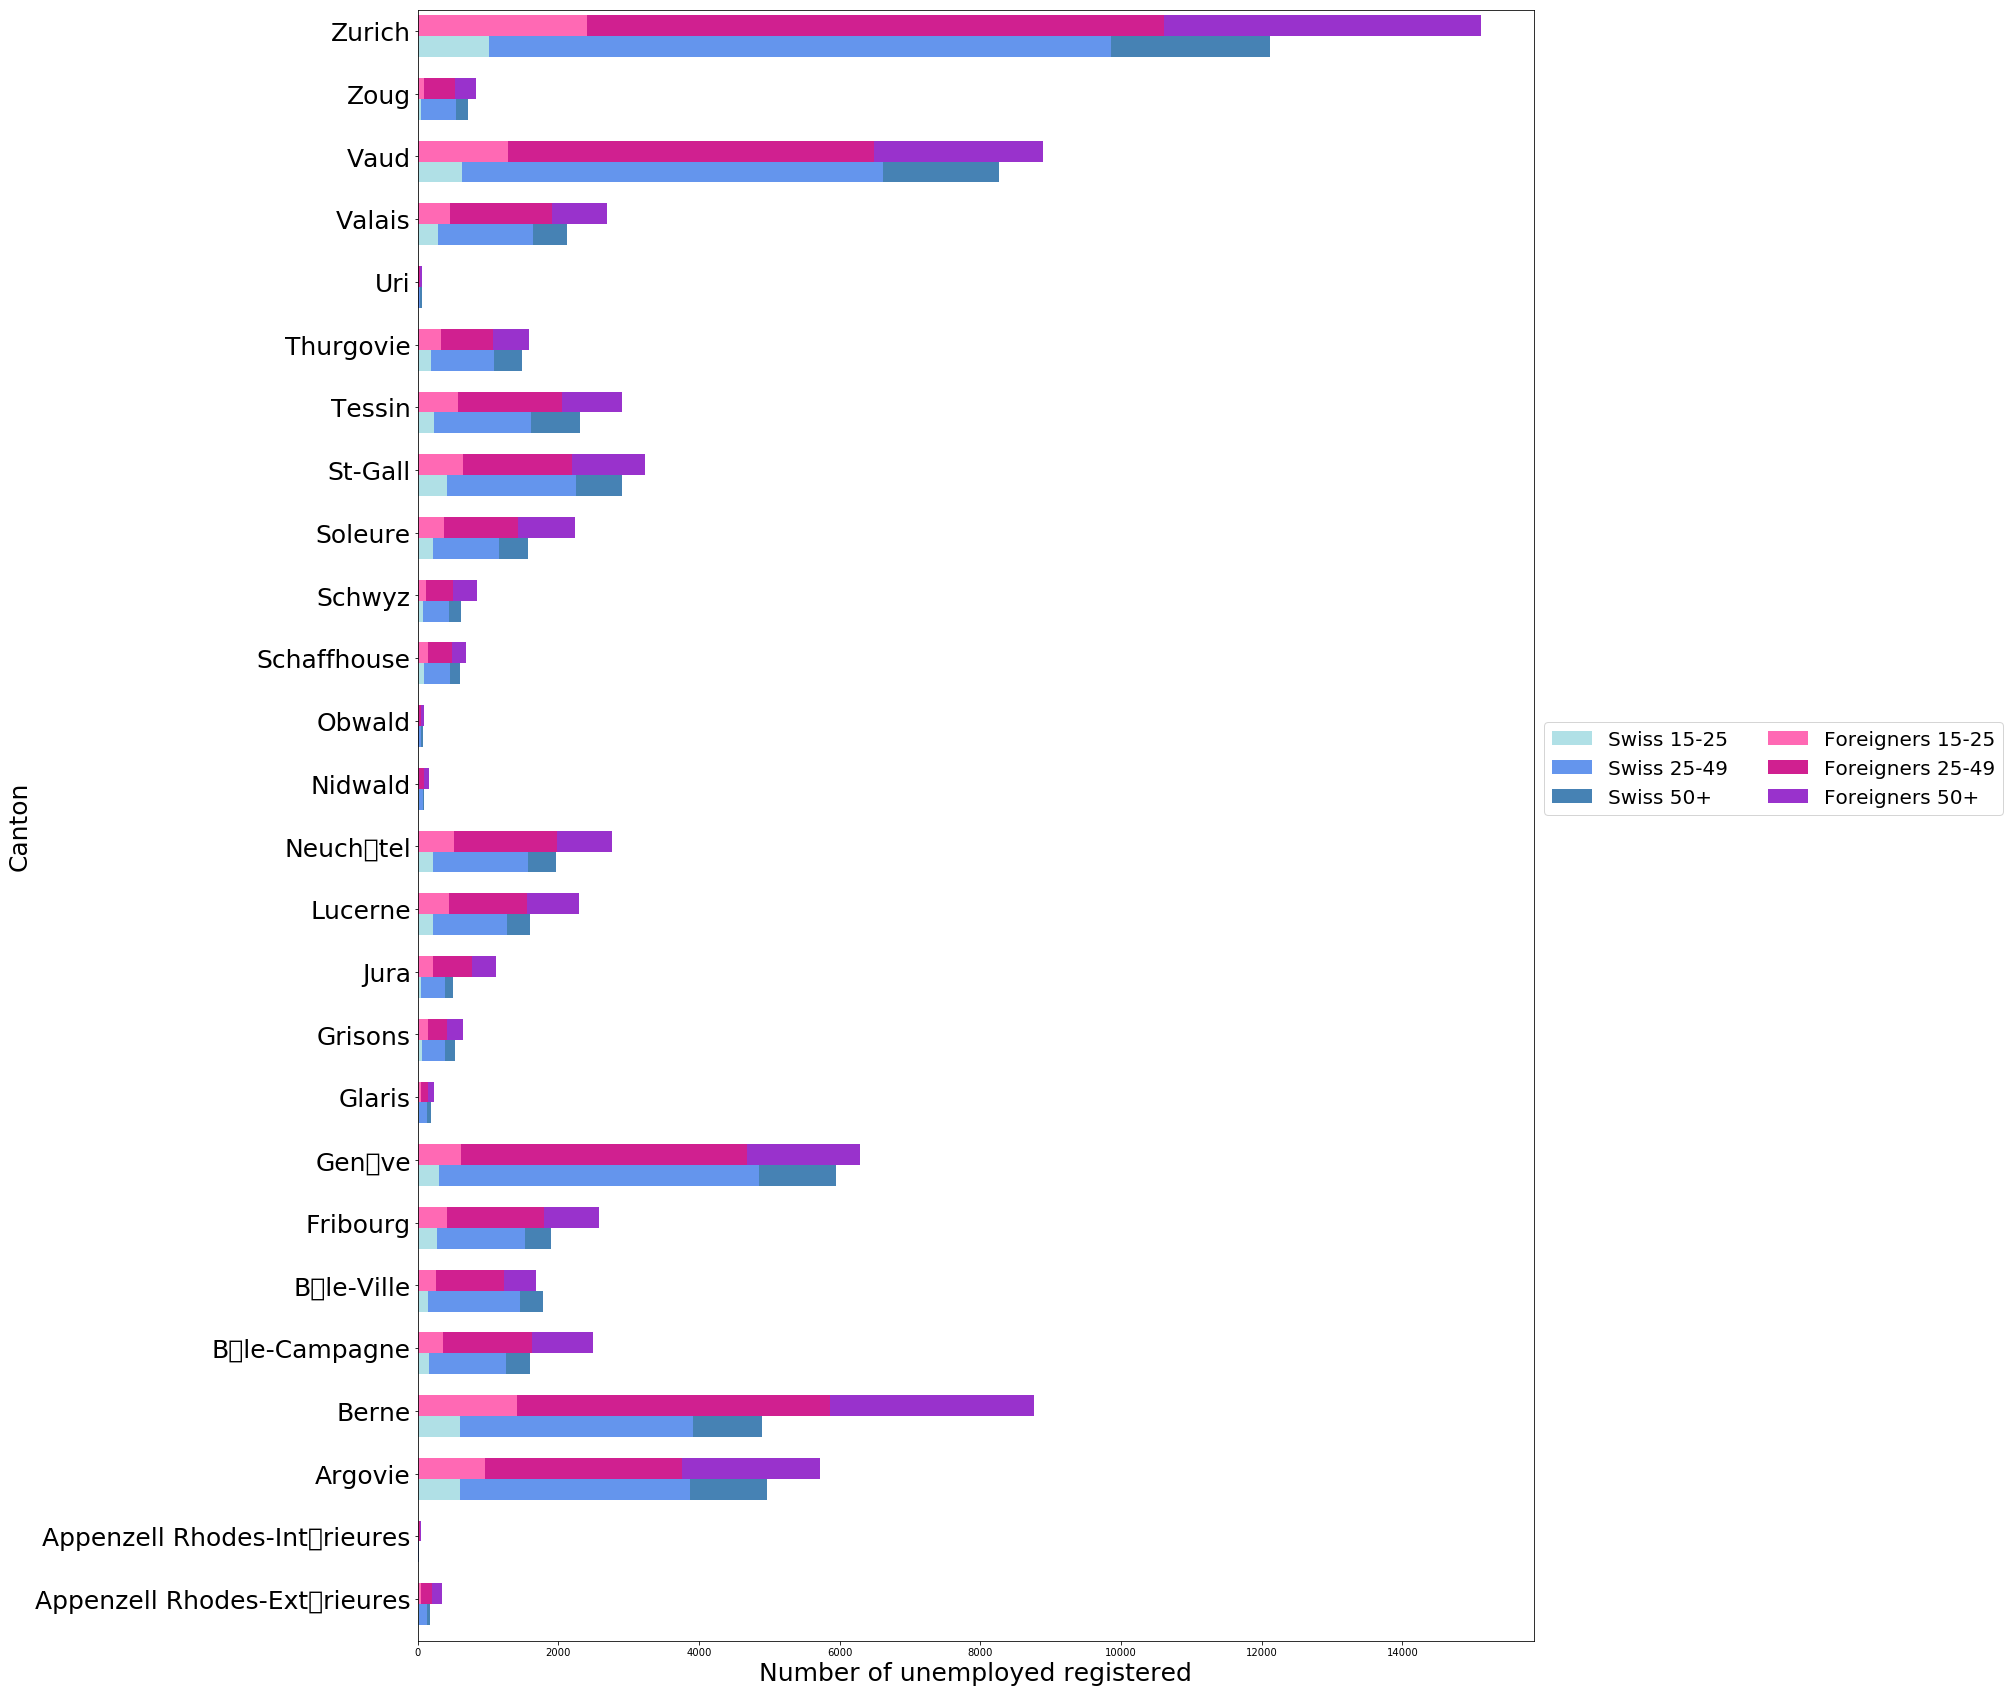

In [30]:
# Initialize the plot
ax = plt.subplot(111)
num_cantons = df_age_foreign.shape[0]

# Create the two plots for foreigners and swiss
ax = df_age_foreign.iloc[:,:3].plot.barh(ax=ax, figsize=(20,30), stacked=True, legend=True, label='Foreigners', color=['#b0e0e6', '#6495ed', '#4682b4'])
ax = df_age_swiss.iloc[:,:3].plot.barh(ax=ax, figsize=(20,30), stacked=True, legend=True, label='Swiss', color=['#ff69b4', '#d02090', '#9932cc'])

# Change the position of the bars
h,l = ax.get_legend_handles_labels() 
width=1/3
for i in range(0, 6, 3): 
    for container in h[i:i+3]:
        for bar in container.patches: 
            bar.set_y(bar.get_y() + width * i / 3.0)
            bar.set_height(width)

# Set the ticks and labels
ax.set_yticks((np.arange(0, 2 *num_cantons , 2) + width) / 2.)
ax.set_yticklabels(df_age_foreign.index, fontsize=25)
l[3:] = ['Foreigners ' + x for x in l[3:]]
l[:3] = ['Swiss '+ x for x in l[:3]]
ax.legend( h, l, loc=3, ncol=2, bbox_to_anchor=(1, 0.5), fontsize=20)
ax.set_xlabel('Number of unemployed registered', fontsize=25)
ax.set_ylabel('Canton', fontsize=25)
plt.show()

We normalize with the active population per canton in order to better visualize our results.

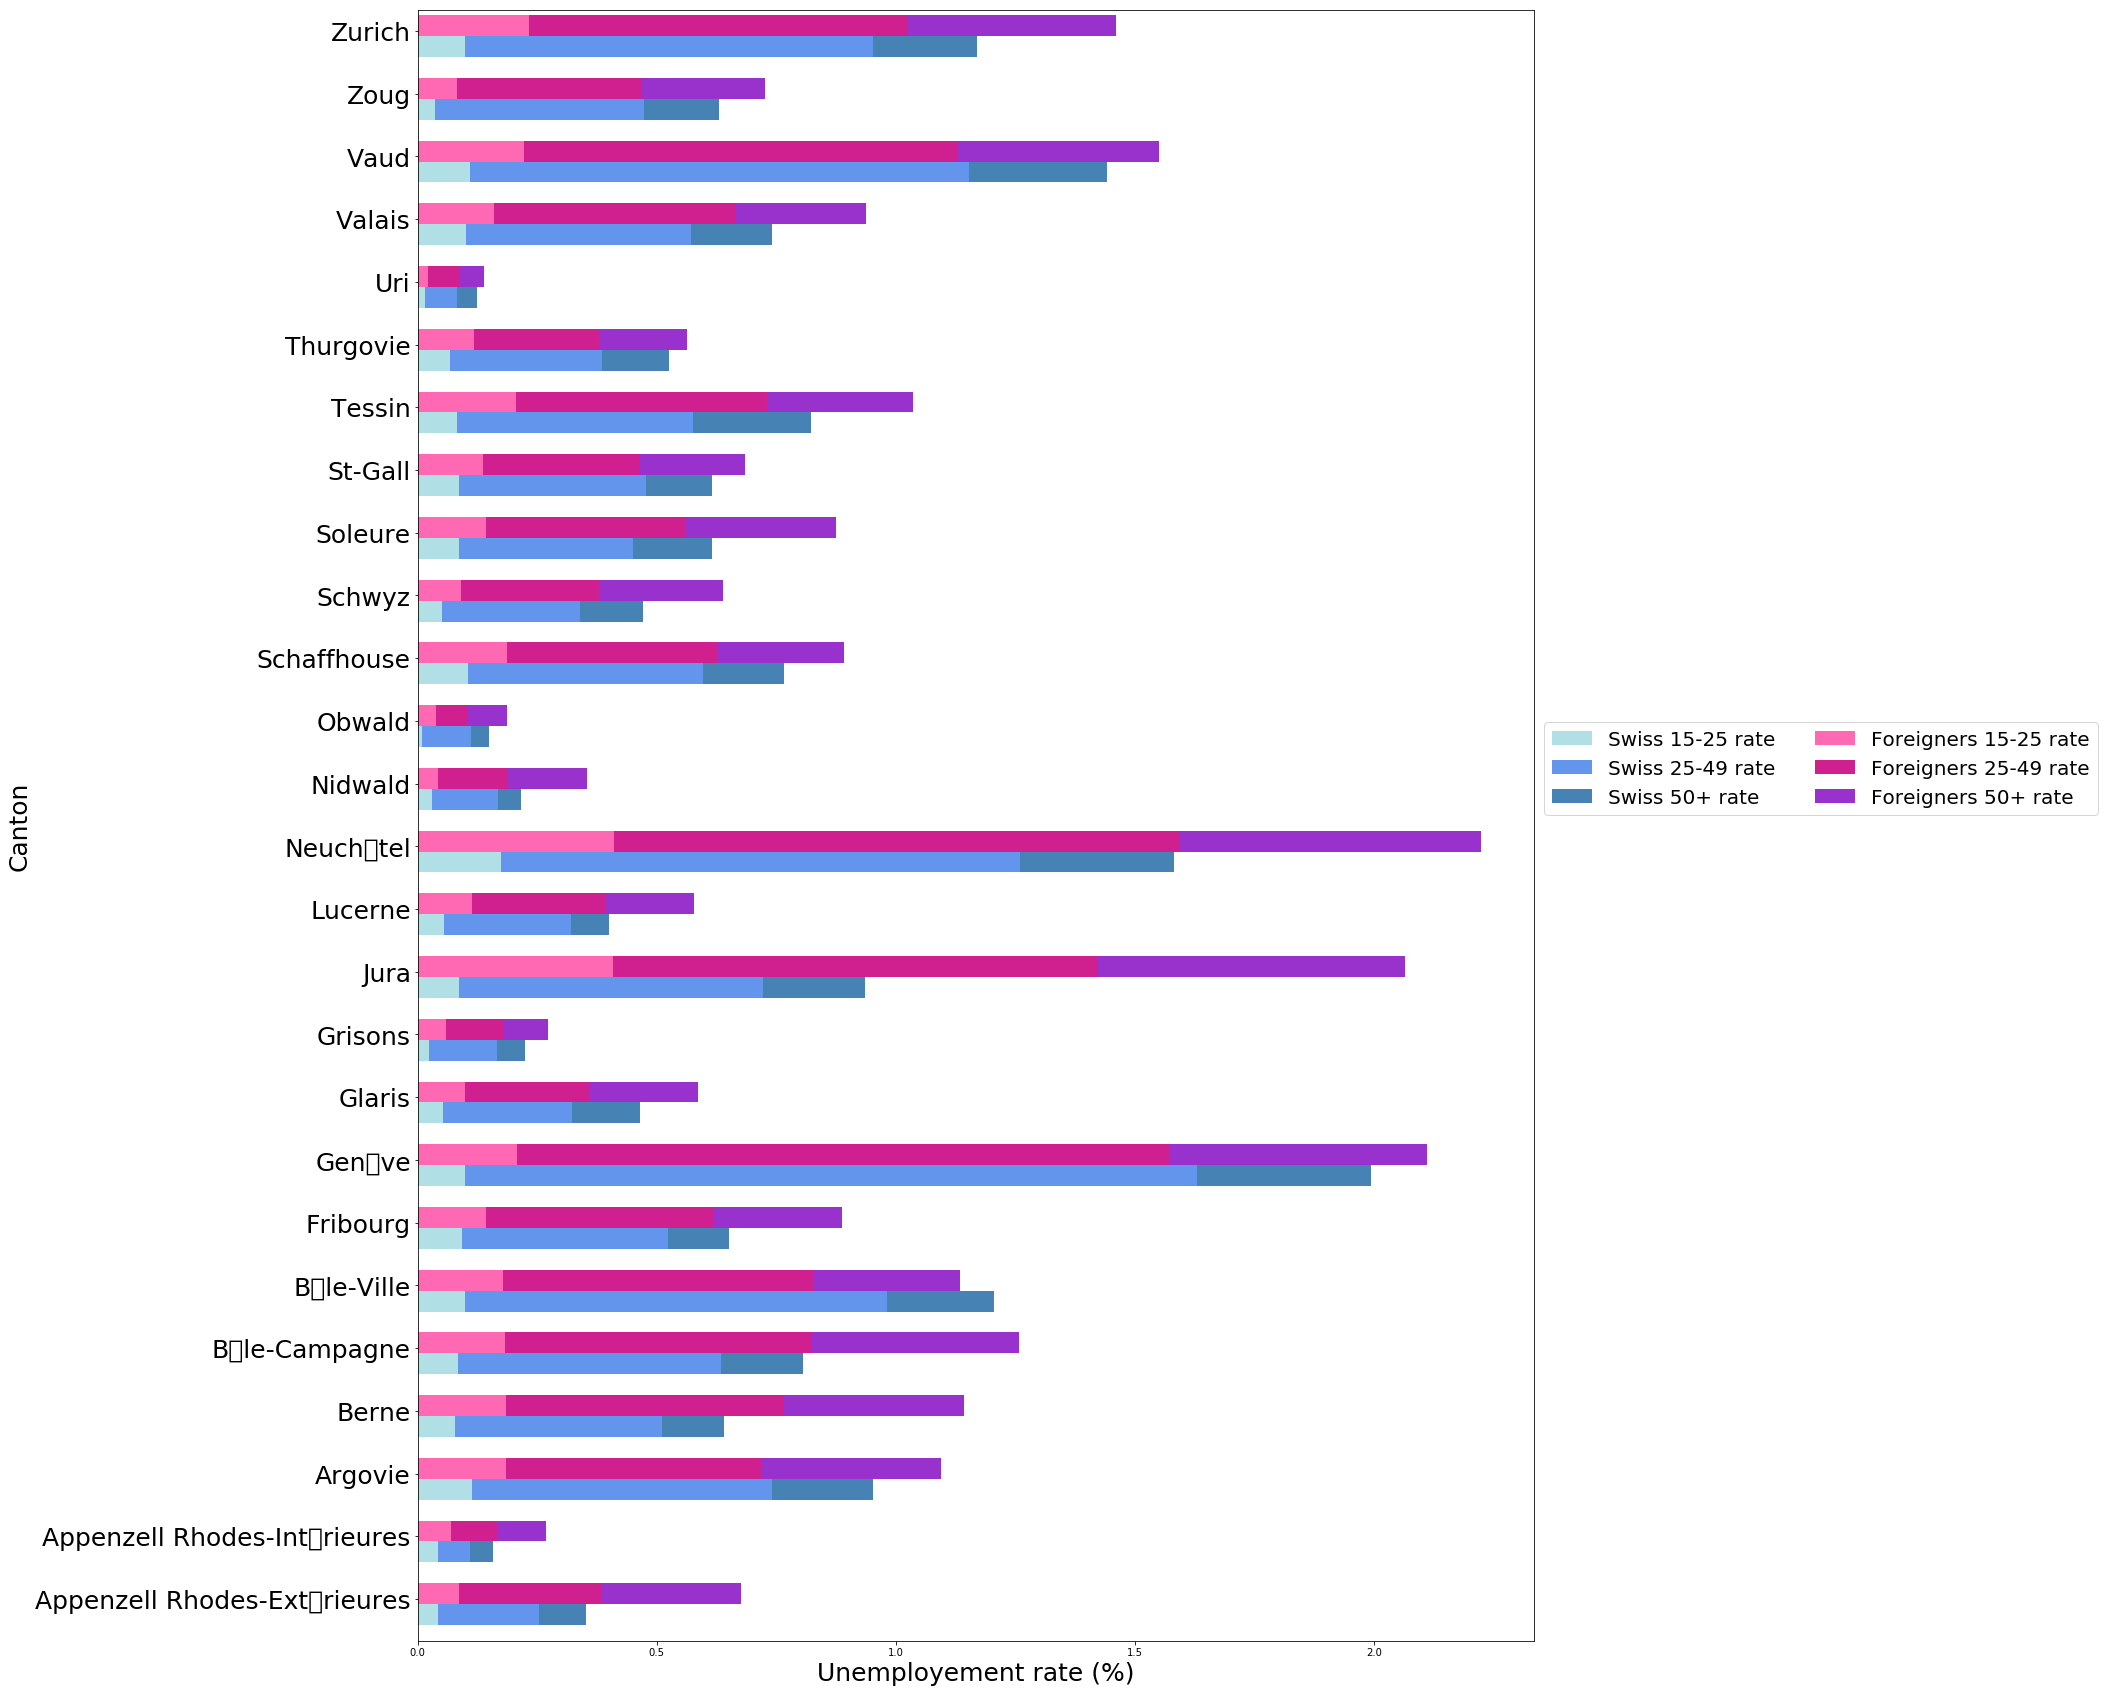

In [31]:
# Initialize the plot
ax = plt.subplot(111)
num_cantons = df_age_foreign.shape[0]

# Create the two plots for foreigners and swiss
ax = df_age_foreign.iloc[:,4:].plot.barh(ax=ax, figsize=(20,30), stacked=True, legend=True, label='Foreigners', color=['#b0e0e6', '#6495ed', '#4682b4'])
ax = df_age_swiss.iloc[:,4:].plot.barh(ax=ax, figsize=(20,30), stacked=True, legend=True, label='Swiss', color=['#ff69b4', '#d02090', '#9932cc'])

# Change the position of the bars
h,l = ax.get_legend_handles_labels() 
width=1/3
for i in range(0, 6, 3): 
    for container in h[i:i+3]:
        for bar in container.patches: 
            bar.set_y(bar.get_y() + width * i / 3.0)
            bar.set_height(width)

# Set the ticks and labels
ax.set_yticks((np.arange(0, 2 *num_cantons , 2) + width) / 2.)
ax.set_yticklabels(df_age_foreign.index, fontsize=25)
l[3:] = ['Foreigners ' + x for x in l[3:]]
l[:3] = ['Swiss '+ x for x in l[:3]]
ax.legend( h, l, loc=3, ncol=2, bbox_to_anchor=(1, 0.5), fontsize=20)
ax.set_xlabel('Unemployement rate (%)', fontsize=25)
ax.set_ylabel('Canton', fontsize=25)
plt.show()

We observe that overall, all age classes have a distribution of unemployement similar. However, we note that for young and old workers, the gap between foreigners and swiss is more accentuated than for 25-49 years old workers. This might be due to the fact that people are more likely to 'receive/leave' a job when they are young or old.

To illustrate this trend some more, we decided to visualize the unemployement rate among the age categories by cantons.

In [32]:
# Get rid of lines with total numbers in nationality
df_ch_age_nat_no_total = df_ch_age_nat[df_ch_age_nat['Nationality']!='Total']
df_ch_age_nat_no_total=df_ch_age_nat_no_total.drop('Total')

# Find the names of every geometry figures
canton_names = list(map(lambda x: x['properties']['name'], geo_json_data['objects']['cantons']['geometries']))
new_canton_names = [[canton]*8 for canton in canton_names]
new_canton_names = [item for sublist in new_canton_names for item in sublist]
# Add names in the dataframes
df_ch_age_nat_no_total['topo names'] = new_canton_names

# Transform numbers to nuerical values
df_ch_age_nat_no_total['Unemployed registered'] = pd.to_numeric(df_ch_age_nat_no_total['Unemployed registered'].str.replace('\'', ''))

# drop nationalities
df_ch_age_nat_aggregated=df_ch_age_nat_no_total.drop('Nationality',axis=1)
# Create a new age group name which includes the total
new_age_group_name=df_ch_age_nat_aggregated['Age group name']
new_age_group_name.loc[df_ch_age_nat_aggregated['Age group'] =="Total"]='Total'
df_ch_age_nat_aggregated['Age group name']=new_age_group_name
# Drop the age group
df_ch_age_nat_aggregated=df_ch_age_nat_aggregated.drop('Age group')
# Aggregate per canton and age group name
df_ch_age_nat_aggregated=df_ch_age_nat_aggregated.reset_index().set_index(['Canton','topo names','Age group name']).sum(level=[0,1,2])

# Removing the totals in age group name and keeping them on a separate column
df_ch_age_nat_aggregated=df_ch_age_nat_aggregated.reset_index().set_index('Canton')
df_ch_age_nat_aggregated['Totals']=df_ch_age_nat_aggregated.reset_index().set_index(['Age group name','Canton']).loc['Total'].drop('topo names', axis=1)
df_ch_age_nat_aggregated=df_ch_age_nat_aggregated[df_ch_age_nat_aggregated['Age group name']!='Total']

# Building the percentage of the age group in unemployment
df_ch_age_nat_aggregated['Proportion of unemployed individuals']=df_ch_age_nat_aggregated['Unemployed registered']/df_ch_age_nat_aggregated['Totals']
df_ch_age_nat_aggregated=df_ch_age_nat_aggregated.drop('Totals',axis=1)
df_ch_age_nat_aggregated.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,topo names,Age group name,Unemployed registered,Proportion of unemployed individuals
Canton,,,,
Appenzell Rhodes-Extrieures,Appenzell Ausserrhoden,15-25,65,0.124283
Appenzell Rhodes-Extrieures,Appenzell Ausserrhoden,25-49,259,0.495220
Appenzell Rhodes-Extrieures,Appenzell Ausserrhoden,50+,199,0.380497
Appenzell Rhodes-Intrieures,Appenzell Innerrhoden,15-25,16,0.258065
Appenzell Rhodes-Intrieures,Appenzell Innerrhoden,25-49,24,0.387097


In [33]:
threshold_scale=np.linspace(df_ch_age_nat_aggregated['Proportion of unemployed individuals'].min(),
                            df_ch_age_nat_aggregated['Proportion of unemployed individuals'].max(), 
                            num=6).tolist()

#### Map of unemployement for 15-25 years old individuals

In [34]:
df_ch_age_nat_aggregated_15_25=df_ch_age_nat_aggregated[df_ch_age_nat_aggregated['Age group name']=='15-25']

m = folium.Map(location=ch_coord, tiles='cartoDB positron', zoom_start=8)
m.choropleth(open(ch_canton), data=df_ch_age_nat_aggregated_15_25, columns=['topo names', 'Proportion of unemployed individuals'], 
             topojson='objects.cantons', name='Proportion of unemployed individuals 15-25',
                  key_on="feature.properties.name", fill_color='BuPu', legend_name='Proportion of unemployed individuals 15-25',
            threshold_scale=threshold_scale)


url_save = "./html/prportion_15_25.html"
m.save(url_save)
# m
displaymap(url_save)

As we can see, unemployed individuals aged between 15 to 25 do not represent the bulk of the unemployed people

#### Map of unemployement for 25-49 years old individuals

In [35]:
df_ch_age_nat_aggregated_25_49=df_ch_age_nat_aggregated[df_ch_age_nat_aggregated['Age group name']=='25-49']

m = folium.Map(location=ch_coord, tiles='cartoDB positron', zoom_start=8)
m.choropleth(open(ch_canton), data=df_ch_age_nat_aggregated_25_49, columns=['topo names', 'Proportion of unemployed individuals'], 
             topojson='objects.cantons', name='Proportion of unemployed individuals 25_49',
                  key_on="feature.properties.name", fill_color='BuPu', legend_name='Proportion of unemployed individuals 25-49',
            threshold_scale=threshold_scale)

url_save = "./html/prportion_25_49.html"
m.save(url_save)
# m
displaymap(url_save)

Here, on the contrary, unemployed individuals aged between 49 to 50+  represent the bulk of the unemployed people

#### Map of unemployed individuals 50+ years old 

In [36]:
df_ch_age_nat_aggregated_50=df_ch_age_nat_aggregated[df_ch_age_nat_aggregated['Age group name']=='50+']

m = folium.Map(location=ch_coord, tiles='cartoDB positron', zoom_start=8)
m.choropleth(open(ch_canton), data=df_ch_age_nat_aggregated_50, columns=['topo names', 'Proportion of unemployed individuals'], 
             topojson='objects.cantons', name='Proportion of unemployed individuals 50+',
                  key_on="feature.properties.name", fill_color='BuPu', legend_name='Proportion of unemployed individuals 50+',
            threshold_scale=threshold_scale)

url_save = "./html/prportion_50.html"
m.save(url_save)
# m
displaymap(url_save)

Here, we can se that the proportion of unemployed people who are aged 50+ is higher than the youngest, but smaller than the middle aged individuals